# <center> TensorFlow and Deep Learning </center>

## Convolutional Neural Networks - CIFAR10

<br>

<center> ![](cifar10.png) </center>

*<p style="text-align:right">CIFAR10 - Adapted from Alex Krizhevsky at https://www.cs.toronto.edu/~kriz/cifar.html</p>*



In [14]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

In [15]:
class CifarLoader(object):
    def __init__(self, source_files):
        self._source = source_files
        self._i = 0
        self.images = None
        self.labels = None
        
    def load(self):
        data = [unpickle(f) for f in self._source]
        images = np.vstack([d[b"data"] for d in data])
        n = len(images)
        self.images = images.reshape(n, 3, 32, 32).transpose(0, 2, 3, 1).astype(float)/255
        self.labels = one_hot(np.hstack([d[b"labels"] for d in data]), 10)
        return self
    
    def next_batch(self, batch_size):
        x, y = self.images[self._i:self._i+batch_size], self.labels[self._i:self._i+batch_size]
        self._i = (self._i + batch_size)%len(self.images)
        return x, y    

In [16]:
path = "cifar10"

def unpickle(file):
    with open(os.path.join(path,file), 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def one_hot(vec, vals=10):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

class CifarDataManager(object):
    def __init__(self):
        self.train = CifarLoader(["data_batch_{}".format(i) for i in range(1,6)]).load()
        self.test = CifarLoader(["test_batch"]).load()

Number of train images: 50000
Number of train labels: 50000
Number of test images: 10000
Number of test labels: 10000


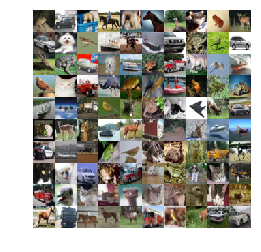

In [17]:
def display_cifar(images, size):
    n = len(images)
    plt.figure()
    plt.gca().set_axis_off()
    im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)]) for i in range(size)])
    plt.imshow(im)
    plt.show()
    
d = CifarDataManager()

print("Number of train images: {}".format(len(d.train.images)))
print("Number of train labels: {}".format(len(d.train.labels)))
print("Number of test images: {}".format(len(d.test.images)))
print("Number of test labels: {}".format(len(d.test.labels)))

images = d.train.images
display_cifar(images, 10)

In [18]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W)+b)

def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W)+b 

In [19]:
cifar = CifarDataManager() 

x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3]) 
y_ = tf.placeholder(tf.float32, shape=[None, 10]) 
keep_prob = tf.placeholder(tf.float32) 

conv1 = conv_layer(x, shape=[5, 5, 3, 32])
conv1_pool = max_pool_2x2(conv1) 

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64]) 
conv2_pool = max_pool_2x2(conv2) 
conv2_flat = tf.reshape(conv2_pool, [-1, 8 * 8 * 64]) 

full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob) 

y_conv = full_layer(full1_drop, 10)

In [20]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy) 
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def test(sess):
    X = cifar.test.images.reshape(10,1000,32,32,3)
    Y = cifar.test.labels.reshape(10,1000,10)
    acc = np.mean([sess.run(accuracy,feed_dict={x:X[i], y_:Y[i], keep_prob:1.0}) for i in range(10)])
    print("Accuracy: {:.4}%".format(acc*100))
    
STEPS = 120
BATCH_SIZE = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(STEPS):
        batch = cifar.train.next_batch(BATCH_SIZE)
        sess.run(train_step, feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})
        
    test(sess)

Accuracy: 41.4%


## Tactics to Improve the Accuracy and the Performance of the Model

1. Train the model for longer
2. Train on better hardware (GPU, TPU, better CPU)
3. Increase the size of the model (deeper nets, different types of layers, methods, etc)
4. Optimization and preprocessing
5. Data augmentation 

    ![](cat.jpg)
<br>

6. Adopt and adapt (with proper credit) time-proven models